## Collecting article data from The Guardian API

This gathers articles in the period 2009 to August 2024 using The Guardian's API. I initial collected the articles using the search term 'football' but realised to collect articles in full and not get unrelated articles it was best to collect articles from the section 'football'.

In [2]:
import json
import requests
from os import makedirs
from os.path import join, exists
from datetime import date, timedelta
import pandas as pd
import numpy as np
from tqdm import tqdm
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords

In [2]:
MY_API_KEY = '710fe651-165f-40c2-a3cc-af3a08220387'

In [6]:
# Function to collect articles using the query search term football - not used in final version of the dataset
def get_guardian_content(start_date, end_date):
    api_url = 'https://content.guardianapis.com/search?q=football'
    my_params = {
        'from-date': start_date,
        'to-date': end_date,
        'order-by': "newest",
        'show-fields': 'all',
        'page-size': 200,
        'api-key': MY_API_KEY
    }
    
    all_articles = []  
    
    page = 1
    while True:
        my_params['page'] = page
        response = requests.get(api_url, params=my_params)
        data = response.json()
        articles = data.get('response', {}).get('results', [])
        
        if not articles:  
            break
        
        all_articles.extend(articles)
        page += 1

        
        tqdm.write(f"Retrieved {len(all_articles)} articles", end='\r')

        
        
        
    return all_articles




In [19]:
# Function to collect articles from a specific section, in this case being football - Used for the collection of data for the final dataset
def get_guardian_section(start_date, end_date):
    api_url = 'https://content.guardianapis.com/search?section=football'
    my_params = {
        'from-date': start_date,
        'to-date': end_date,
        'order-by': "newest",
        'show-fields': 'all',
        'page-size': 200,
        'api-key': MY_API_KEY
    }
    
    all_articles = []  
    
    page = 1
    while True:
        my_params['page'] = page
        response = requests.get(api_url, params=my_params)
        data = response.json()
        articles = data.get('response', {}).get('results', [])
        
        if not articles:  
            break
        
        all_articles.extend(articles)
        page += 1

        
        tqdm.write(f"Retrieved {len(all_articles)} articles", end='\r')

        
        
        
    return all_articles




In [20]:
# Function to scrape articles by year
# This is done as I was unsure how long it would take to scrape the data from a year
# The function is then used to scrape data from the period 2009 to 2023
# I initially took a shorter time period for testing methods, and in the final version of my project I look at the period of 2015-2024
def scrape_yearly_articles(year):
    start_date = f"{year}-01-01"
    end_date = f"{year}-12-31"
    
    all_articles = get_guardian_section(start_date, end_date)
    
    # Articles are then saved to a json file
    save_path = f"data/guardian_data_{year}.json"
    makedirs('data', exist_ok=True)
    with open(save_path, 'w') as f:
        json.dump(all_articles, f)
    
    print(f'Data saved to {save_path}')

In [36]:
scrape_yearly_articles(2023)

Data saved to data/guardian_data_2023.json


In [37]:
scrape_yearly_articles(2022)

Data saved to data/guardian_data_2022.json


In [38]:
scrape_yearly_articles(2021)

Data saved to data/guardian_data_2021.json


In [39]:
scrape_yearly_articles(2020)

Data saved to data/guardian_data_2020.json


In [40]:
scrape_yearly_articles(2019)

Data saved to data/guardian_data_2019.json


In [41]:
scrape_yearly_articles(2018)

Data saved to data/guardian_data_2018.json


In [42]:
scrape_yearly_articles(2017)

Data saved to data/guardian_data_2017.json


In [43]:
scrape_yearly_articles(2016)

Data saved to data/guardian_data_2016.json


In [44]:
scrape_yearly_articles(2015)

Data saved to data/guardian_data_2015.json


In [45]:
scrape_yearly_articles(2014)

Data saved to data/guardian_data_2014.json


In [46]:
scrape_yearly_articles(2013)

Data saved to data/guardian_data_2013.json


In [47]:
scrape_yearly_articles(2012)

Data saved to data/guardian_data_2012.json


In [48]:
scrape_yearly_articles(2011)

Data saved to data/guardian_data_2011.json


In [49]:
scrape_yearly_articles(2010)

Data saved to data/guardian_data_2010.json


In [50]:
scrape_yearly_articles(2009)

Data saved to data/guardian_data_2009.json


In [ ]:
# As I cannot collect the data for 2024 as a whole, I take the period Jan-Aug
start_date = '2024-01-01'
end_date = '2024-08-31'

response = get_guardian_section(start_date, end_date)

# saved the data to a json file
# makedirs('data', exist_ok=True)
with open('data/guardian_data_2024.json', 'w') as f:
    json.dump(response, f)
    
print('Data saved to', 'data/guardian_data_2024.json')

In [3]:
# I then merge all of the data file so that I create a dataframe including all years
all_data = []
for year in range(2009, 2025):
    with open(f'data/guardian_data_{year}.json') as f:
        data = json.load(f)
        all_data.extend(data)

# full dataset is then saved as a json
with open('data/guardian_data_2009_2024.json', 'w') as f:
    json.dump(all_data, f)

    

In [13]:
# I create a dataframe with all years of data (2009-2024)
df_football = pd.DataFrame(all_data)
df_football.head()

,id,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,apiUrl,fields,isHosted,pillarId,pillarName
0,football/2009/dec/31/harry-redknapp-tottenham-...,article,football,Football,2009-12-31T22:30:02Z,Tottenham's Harry Redknapp fights shy of windo...,https://www.theguardian.com/football/2009/dec/...,https://content.guardianapis.com/football/2009...,{'headline': 'Tottenham's Harry Redknapp fight...,False,pillar/sport,Sport
1,football/2009/dec/31/rio-ferdinand-manchester-...,article,football,Football,2009-12-31T22:30:01Z,"Rio Ferdinand is 'nowhere near' a comeback, sa...",https://www.theguardian.com/football/2009/dec/...,https://content.guardianapis.com/football/2009...,{'headline': 'Rio Ferdinand is 'nowhere near' ...,False,pillar/sport,Sport
2,football/2009/dec/31/fa-cup-fa-internet-tv,article,football,Football,2009-12-31T15:18:48Z,FA confident internet broadcasts of Cup ties s...,https://www.theguardian.com/football/2009/dec/...,https://content.guardianapis.com/football/2009...,{'headline': 'FA confident internet broadcasts...,False,pillar/sport,Sport
3,football/2009/dec/31/portsmouth-player-wages,article,football,Football,2009-12-31T14:55:00Z,Portsmouth players face another wait for wages,https://www.theguardian.com/football/2009/dec/...,https://content.guardianapis.com/football/2009...,{'headline': 'Portsmouth players face another ...,False,pillar/sport,Sport
4,football/2009/dec/31/jose-mourinho-chelsea-return,article,football,Football,2009-12-31T14:29:00Z,Carlo Ancelotti unfazed by José Mourinho rumours,https://www.theguardian.com/football/2009/dec/...,https://content.guardianapis.com/football/2009...,{'headline': 'Carlo Ancelotti unfazed by José ...,False,pillar/sport,Sport


In [14]:
# number of articles in the full dataset 
len(df_football)

115981

### Exploring and cleaning the data so that it is in a usable format for further analysis

In [15]:
# values count of the sectionName
df_football['sectionName'].value_counts()

# should full list
df_football['sectionName'].unique()

array(['Football'], dtype=object)

In [16]:
# value count of the type of the article
df_football['type'].value_counts()

type
article        103992
liveblog         7346
video            2052
gallery          1429
audio             584
interactive       525
picture            53
Name: count, dtype: int64

In [17]:
# keeping only the articles types of articles and liveblog
df_football = df_football[df_football['type'].isin(['article', 'liveblog'])]


In [18]:
# checking the new number of articles 
len(df_football)

111338

In [19]:
# finding an example fo the column field, as this includes data in dictionary form which I want to explore further 
df_football.loc[100]['fields']

{'headline': 'Boxing Day clockwatch – as it happened',
 'standfirst': 'All the action in the top flight as Roberto Mancini begun his Manchester City reign with a win and Chelsea were held at Birmingham',
 'trailText': '<p>All the action in the top flight as Roberto Mancini begun his Manchester City reign with a win and Chelsea were held at Birmingham</p>',
 'byline': 'Simon Burnton and Nicky Bandini',
 'main': '<figure class="element element-image" data-media-id="gu-image-357365416"> <img src="http://static.guim.co.uk/sys-images/Football/Clubs/Club_Home/2009/12/26/1261840939186/Roberto-Mancini-001.jpg" alt="Roberto Mancini" width="460" height="276" class="gu-image" /> <figcaption> <span class="element-image__caption">Roberto Mancini\'s fetching new scarf. I was given a scarf for Christmas too, you know. Photograph: Darren Staples/Reuters</span> <span class="element-image__credit">Photograph: Darren Staples/Reuters</span> </figcaption> </figure>',
 'body': '<!-- Block 1 --> <p>Simon wil

In [20]:
# add new column with date of publication
df_football['date'] = df_football['webPublicationDate'].str[:10]

In [21]:
# creating summary of number of articles per day
articles_per_day = df_football['date'].value_counts().sort_index()

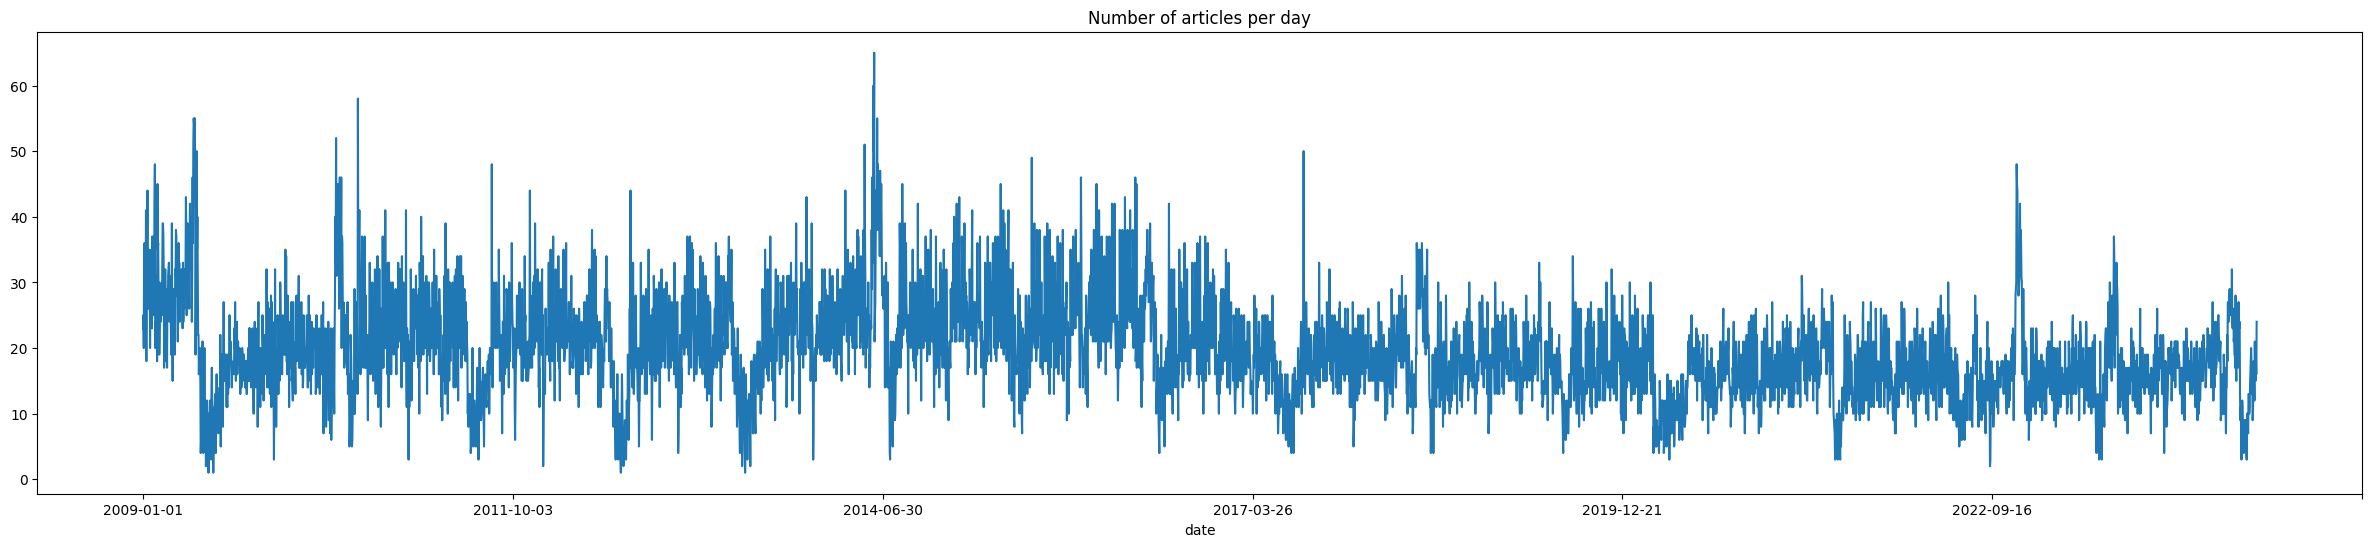

In [22]:
# plot of number of articles per day
articles_per_day.plot(kind='line', figsize=(30, 6), title='Number of articles per day')
plt.show()

In [23]:
# save data to csv
df_football.to_csv('data/guardian_football_data.csv', index=False)